In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)

## Lectura de Datos

In [3]:
vehiculos = pd.read_pickle("./vehiculos.3.variables_agrupadas.pkl")

In [4]:
vehiculos.dtypes

fabricante                object
modelo                    object
year                       int64
desplazamiento           float64
cilindros                float64
transmision               object
traccion                  object
clase                     object
combustible               object
consumo                    int64
co2                      float64
clase_tipo              category
traccion_tipo           category
transmision_tipo        category
combustible_tipo        category
tamano_motor_tipo       category
consumo_tipo            category
co2_tipo                category
consumo_litros_milla     float64
dtype: object

In [5]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


In [6]:
from ipywidgets import interact, fixed

## Recuento por múltiples grupos

In [7]:
def pivot_recuento(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field,
                                 index=rows,
                                 columns=columns,
                                 aggfunc=np.size
                             ).dropna(axis=0, how="all")
    return df_pivot    

In [8]:
consumo_combustible = pivot_recuento(vehiculos, "combustible_tipo", "consumo_tipo", "year")
consumo_combustible

consumo_tipo,muy bajo,bajo,moderado,alto,muy alto
combustible_tipo,,,,,
Hibrido,61.0,6.0,1.0,2.0,NaN
Normal,5686.0,4931.0,5736.0,3158.0,4567.0
Otros tipos de combustible,521.0,340.0,508.0,482.0,586.0
Premium,1386.0,2211.0,3836.0,1146.0,1627.0


In [9]:
def heatmap_recuento_tipos(df, col1, col2):
    pivot_table = pivot_recuento(df, col1, col2, "year")
    sns.heatmap(pivot_table, annot=True, fmt="g")
    plt.ylabel(col1)
    plt.xlabel(col2)
    plt.show()

In [10]:
interact(heatmap_recuento_tipos, col1=vehiculos.columns, col2=vehiculos.columns, df=fixed(vehiculos))

interactive(children=(Dropdown(description='col1', options=('fabricante', 'modelo', 'year', 'desplazamiento', …

<function __main__.heatmap_recuento_tipos(df, col1, col2)>

## Conclusiones

- Hay más vehículos de dos ruedas de bajo consumo qe de tracción a las 4 ruedas.
- Los fabricantes se concentran más en vehículos de motor pequeño/bajo consumo y motor muy grande/alto consumo.
- La mayor parte de coches tiene transmisión automática, con los coches pequeños teniendo valores similares a coches automáticos y manuales.
- Hay una cantidad de camionetas que son más contaminantes que cualquier otro tipo de coche.

## Medias por variables categóricas

In [11]:
def medias_por_categoria(col_grupo, col_calculo):
    vehiculos.groupby(col_grupo)[col_calculo].mean().plot.barh()
    plt.ylabel(col_grupo)
    plt.xlabel("Valores medios de {}".format(col_calculo))
    plt.show()

In [12]:
columnas_numericas = vehiculos.select_dtypes(["int64", "float64"]).columns
columnas_categorias = vehiculos.select_dtypes(["object", "category"]).columns
columnas_tipo = vehiculos.columns[vehiculos.columns.str.endswith("_tipo")]

In [13]:
interact(medias_por_categoria, col_grupo=columnas_categorias, col_calculo=columnas_numericas)

interactive(children=(Dropdown(description='col_grupo', options=('fabricante', 'modelo', 'transmision', 'tracc…

<function __main__.medias_por_categoria(col_grupo, col_calculo)>

### Conclusiones

- Vehiculos con transmision automática tienen valores de co2 y consumo ligeramente más altos
- Furgoneta y camionetas tienen el consumo más alto (alrededor de 0.25 litros/milla). Por otra parte, los coches familiares y pequeños tienen menor consumo de gasolina (<0.15 litros/milla)
- Los vehículos híbridos emiten menos de la mitad de CO2 que el resto de vehículos (que tienen similares emisiones).

### Medias por múltiples tipos

In [19]:
def pivot_media(rows, columns, calc_field):
    df_pivot = vehiculos.pivot_table(values=calc_field,
                                    index=rows,
                                    columns=columns,
                                    aggfunc=np.mean
                                    ).dropna(axis=0, how="all")
    return df_pivot
    

In [20]:
pivot_media("combustible_tipo", "consumo_tipo", "co2")

consumo_tipo,muy bajo,bajo,moderado,alto,muy alto
combustible_tipo,,,,,
Hibrido,144.213115,274.166667,169.000000,463.000000,NaN
Normal,329.216213,406.988299,469.701748,538.449897,659.006325
Otros tipos de combustible,338.857657,426.649875,493.097404,572.344314,634.370636
Premium,337.768474,409.595587,469.455411,540.596570,676.389701


In [21]:
def heatmap_medias_tipos(col1, col2, col3):
    pivot_table = pivot_media(col1, col2, col3)
    sns.heatmap(pivot_table, annot=True, fmt="g")
    plt.ylabel(col1)
    plt.xlabel(col2)
    plt.show()

In [22]:
interact(heatmap_medias_tipos, col1=vehiculos.columns, col2=vehiculos.columns, col3=columnas_numericas)

interactive(children=(Dropdown(description='col1', options=('fabricante', 'modelo', 'year', 'desplazamiento', …

<function __main__.heatmap_medias_tipos(col1, col2, col3)>

### Conclusiones

- Camionetas de gasolina Premium consumen un 38% más que vehículos pequeños que usan el mismo tipo de gasolina.

## Comparación de tendencias (temporales)

En este dataset en particular, tenemos una variable temporal `year`. A la cual echamos un vistazo en un apartado anterior, pero que conviene revisar de nuevo.
Podemos considerarla una variable ordinal (ya que no es una variable continua).

Para la cual tiene sentido ver la evolución. Para ello, los gráficos de línea son lo ideal.

In [23]:
vehiculos_pre_2017 = vehiculos.query("year<2017")

<AxesSubplot:xlabel='year'>

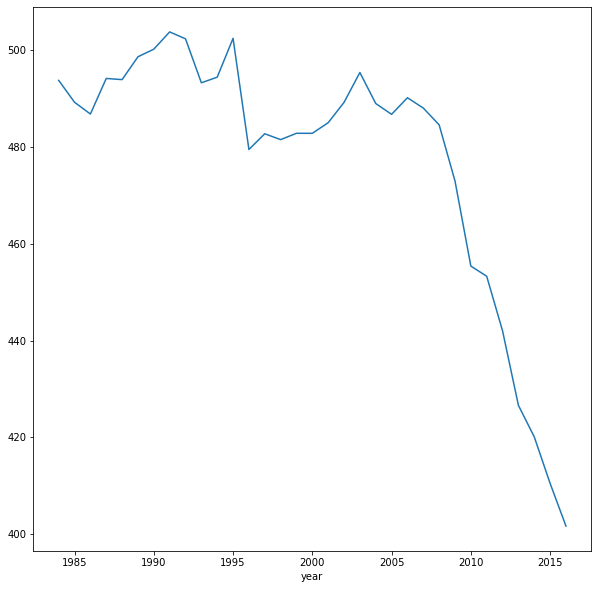

In [24]:
vehiculos_pre_2017.groupby('year')['co2'].mean().plot()

Vemos que en general la emisión de co2 se ha reducido bastante con el tiempo.

In [25]:
def evolucion_medias(col_calculo):
    vehiculos_pre_2017.groupby('year')[col_calculo].mean().plot()
    plt.show()

In [26]:
interact(evolucion_medias, col_calculo=columnas_numericas)

interactive(children=(Dropdown(description='col_calculo', options=('year', 'desplazamiento', 'cilindros', 'con…

<function __main__.evolucion_medias(col_calculo)>

Vemos que históricamente se ha ido aumentando la cilindrada (y desplazamiento). En los vehículos fabricados, pero a partir del 2010 esta tendencia se invierte.
Vemos que ambas variables están linealmente relacionadas.

También vemos que el consumo y emisión de co2 ha ido bajando a lo largo de los años, y dicha tendencia se atenuó a partir del 2006.

<AxesSubplot:xlabel='cilindros', ylabel='desplazamiento'>

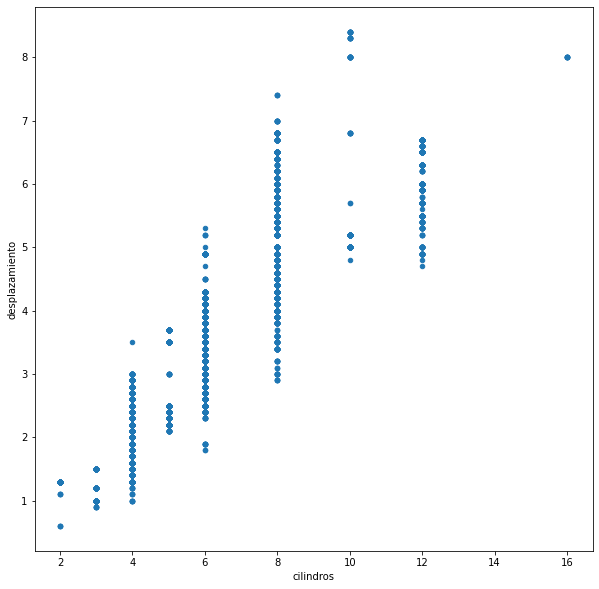

In [28]:
vehiculos.plot.scatter(x="cilindros", y="desplazamiento")

In [29]:
def evolucion_recuento(col_calculo):
    for categoria in vehiculos_pre_2017[col_calculo].unique():
        n_vehiculos_categoria_year = vehiculos_pre_2017[vehiculos_pre_2017[col_calculo]==categoria].groupby(
        "year").apply(np.size)
        plt.plot(
            n_vehiculos_categoria_year.index,
            n_vehiculos_categoria_year,
            label=categoria
        )
        plt.legend()

In [31]:
interact(evolucion_recuento, col_calculo=columnas_tipo)

interactive(children=(Dropdown(description='col_calculo', options=('clase_tipo', 'traccion_tipo', 'transmision…

<function __main__.evolucion_recuento(col_calculo)>

Una vez hemos terminado el análisis, el paso final es compilar toda la información obtenida en un documento.

Dicho documento tiene 2 objetivos principales:

- Informar a aquellas personas interesadas de los descubrimientos encontrados.
- Facilitar la replicación del análisis por otros Data Scientists.

Una vez hemos terminado el análisis, el paso final es compilar toda la información obtenida en un documento. Dicho documento tiene dos objetivos principales:

- Informar a aquellas personas interesadas de los descubrimientos encontrados. ¿Esto nos incluye a nosotros mismos en el futuro!
- Facilitar la replicación del análisis por otros Data Scientists.


# Conclusiones del análisis


#### Descripción

El dataset consiste en información relativa a vehículos vendidos en USA desde 1985. Dicha información incluye detalles técnicos (cilindrada, tipo de transmisión) y detalles medioambientales (consumo de gasolina, emisiones de CO2)

El archivo original está en: https://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip
El archivo que vamos a usar es una versión modificada (con menos columnas)

Descripcion del dataset Original
http://www.fueleconomy.gov/feg/ws/index.shtml#ft7

Las entidades de las que consta dicho dataset son:

* fabricante
* fabricante-modelo
* fabricante-model-año
* fabricante-año

Las variables que existen en dicho dataset son:

```
fabricante         categorica
modelo             categorica
year               ordinal/numérica
desplazamiento     numérica
cilindros          numérica
transmision        categorica
traccion           categorica
clase              categorica
combustible        categorica
consumo            numérica
co2                numérica
```

#### QA

- Las variables desplazamiento, cilindros, transmision y traccion tienen valores inexistentes
- hay un outlier en las variables `co2` y `consumo`
- Hay coches hibridos y coches electricos (hemos removido estos ultimos ya que no contaminan).
- La variable `consumo` esta definida en millas por galon y la variable `co2` está definida como gramos por milla. Dado que el co2 es la variable principal del dataset, hemos creado la variable `consumo_litros_milla` definida como litros por milla para poder comparar con `co2`

#### Distribución de variables

- Ninguna variable numérica sigue una distribución normal

- la variable numérica `cilindros` tiene una distribución de valores discretos no balanceada (cilindrada de 2 y 4 y 8 suman el 95% de los vehiculos). Podria agruparse como variable categórica (2, 4 , 8 y otro)

- El fabricante con la mayor cantidad de modelos es Chevrolet (10% del total)

- 65% de los vehiculos usan gasolina normal

- La distribución de tamaños de motor y de consumo y co2 está equilibrada en todo el rango

- 70% de los vehiculos usan traccion a las dos ruedas

- dos tercios de los coches tienen transmision automática

- La clase mayoritaria de vehiculos es la de coches pequeños (35% del total)

- Existen relaciones lineales entre cilindros/desplazamiento y co2/consumo_litros_milla

#### Comparaciones

- Hay mas vehiculos de dos ruedas de bajo consumo que de traccion a las 4 ruedas
- Los fabricantes se concentran mas en vehiculos de motor pequeño/bajo consumo y motor muy grande/alto consumo
- La mayor parte de coches tienen transmision automatica, con los coches pequeños teniendo valores similares de coches automaticos y manuales
- Hay una cantidad de camionetas que son mas contaminantes que cualquier otro tipo de coche
- Vehiculos con transmision automatica tienen valores de co2 y consumo ligeramente más altos
- Furgonetas y camionetas tienen el consumo más alto (alrededor de 0.25 litros/milla). Por otra parte, los coches familiares y pequeños tienen el menor consumo de gasolina (~0.15 litros/milla)
- los valores de co2 son similares  independientemente del tipo de gasolina empleado
- Camionentas de gasolina Premium consumen un 38% más que vehiculos pequeños que usan el mismo tipo de gasolina
- El consumo y emisión de co2 han ido bajando de forma continuada desde 1985
- Históricamente se ha ido aumentando la cilindrada en los vehiculos fabricados, pero a partir de 2010 esta tendencia se invierte
